# Guided Project: Investigating Fandango Movie Ratings

> In October 2015, a data journalist named Walt Hickey analyzed 
> movie ratings data and found strong evidence to suggest that 
> Fandango's rating system was biased and dishonest ([Fandango](<https://www.fandango.com/>) is an online movie ratings 
> aggregator). He published his analysis in this [article](<https://fivethirtyeight.com/features/fandango-movies-ratings/>)
> — a great piece of data journalism that's totally worth reading.
>
> Fandango displays a 5-star rating system on their website, 
> where the minimum rating is 0 stars and the maximum is 5 stars
>
> ![alt](<https://s3.amazonaws.com/dq-content/288/s1gp_fdg_stars.png>)
> Source: [Fandango](<https://www.fandango.com/>)
>
> Hickey found that there's a significant discrepancy between the 
> number of stars displayed to users and the actual rating, which 
> he was able to find in the HTML of the page. He was able to 
> find that:
>
> * The actual rating was almost always rounded **up** to the 
> nearest half-star. For instance, a 4.1 movie would be rounded 
> off to 4.5 stars, not to 4 stars, as you may expect.
> * In the case of 8% of the ratings analyzed, the rounding up 
> was done to the nearest whole star. For instance, a 4.5 rating 
> would be rounded off to 5 stars.
> * For one movie rating, the rounding off was completely 
> bizarre: from a rating of 4 in the HTML of the page to a 
> displayed rating of 5 stars.
>
> ![alt](<https://s3.amazonaws.com/dq-content/288/s1gp_actual_vs_displayed.png>)
> Source: [FiveThirtyEight](<https://fivethirtyeight.com/features/fandango-movies-ratings/>)
>
> The two distributions above are displayed using a simple line 
> plot, which is also a valid way to show the shape of a 
> distribution. The variable being examined is movie rating, and 
> for each unique rating we can see its relative frequency 
> (percentage) on the y-axis of the graph. When an analysis 
> report is intended for large audiences, relative frequencies 
> (especially percentages) are preferred over absolute 
> frequencies. Both distributions above are strongly left skewed, 
> suggesting that movie ratings on Fandango are generally high or 
> very high. We can see there's no rating under 2 stars in the 
> sample Hickey analyzed. The distribution of displayed ratings 
> is clearly shifted to the right compared to the actual rating 
> distribution, suggesting strongly that Fandango ratings of the 
> movie was more towards a higher side of the rating system.
>
> In this project, we'll analyze more recent movie ratings data 
> to determine whether there has been any change in Fandango's 
> rating system after Hickey's analysis.



> One of the best ways to figure out whether there has been any 
> change in Fandango's rating system after Hickey's analysis is 
> to compare two datasets - 
> * [previous to Hickey's analysis](<https://github.com/fivethirtyeight/data/tree/master/fandango>) 
> * [after Hickey's analysis](<https://github.com/mircealex/Movie_ratings_2016_17>)
>
> Our goal will be to determine whether there has been any 
> changes in Fandango's rating system after Hickey's analysis.

In [1]:
# Reading in and exploring briefly the two data sets to understand 
# their structure.

In [2]:
import pandas as pd

In [3]:
previousdata = pd.read_csv('fandango_score_comparison.csv')
afterdata = pd.read_csv('movie_ratings_16_17.csv')
print(previousdata.shape)
print(afterdata.shape)

(146, 22)
(214, 15)


In [4]:
pd.options.display.max_columns = 22 

In [5]:
previousdata.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,Metacritic_norm,Metacritic_user_nom,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,3.30,3.55,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,3.35,3.75,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,3.20,4.05,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.2,1.10,2.35,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.4,1.45,1.70,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5


In [6]:
previousdata.tail()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,Metacritic_norm,Metacritic_user_nom,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
141,Mr. Holmes (2015),87,78,67,7.9,7.4,4.0,4.0,4.35,3.90,3.35,3.95,3.70,4.5,4.0,3.5,4.0,3.5,33,7367,1348,0.0
142,'71 (2015),97,82,83,7.5,7.2,3.5,3.5,4.85,4.10,4.15,3.75,3.60,5.0,4.0,4.0,4.0,3.5,60,24116,192,0.0
143,"Two Days, One Night (2014)",97,78,89,8.8,7.4,3.5,3.5,4.85,3.90,4.45,4.40,3.70,5.0,4.0,4.5,4.5,3.5,123,24345,118,0.0
144,Gett: The Trial of Viviane Amsalem (2015),100,81,90,7.3,7.8,3.5,3.5,5.00,4.05,4.50,3.65,3.90,5.0,4.0,4.5,3.5,4.0,19,1955,59,0.0
145,"Kumiko, The Treasure Hunter (2015)",87,63,68,6.4,6.7,3.5,3.5,4.35,3.15,3.40,3.20,3.35,4.5,3.0,3.5,3.0,3.5,19,5289,41,0.0


In [7]:
afterdata.head()

,movie,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,n_audience,nr_metascore,nr_imdb,nr_tmeter,nr_audience
0,10 Cloverfield Lane,2016,76,7.2,90,79,3.5,3.80,3.60,4.50,3.95,4.0,3.5,4.5,4.0
1,13 Hours,2016,48,7.3,50,83,4.5,2.40,3.65,2.50,4.15,2.5,3.5,2.5,4.0
2,A Cure for Wellness,2016,47,6.6,40,47,3.0,2.35,3.30,2.00,2.35,2.5,3.5,2.0,2.5
3,A Dog's Purpose,2017,43,5.2,33,76,4.5,2.15,2.60,1.65,3.80,2.0,2.5,1.5,4.0
4,A Hologram for the King,2016,58,6.1,70,57,3.0,2.90,3.05,3.50,2.85,3.0,3.0,3.5,3.0


In [8]:
afterdata.tail()

,movie,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,n_audience,nr_metascore,nr_imdb,nr_tmeter,nr_audience
209,X-Men: Apocalypse,2016,52,7.1,48,67,4.0,2.6,3.55,2.40,3.35,2.5,3.5,2.5,3.5
210,XX,2017,64,4.7,71,17,3.0,3.2,2.35,3.55,0.85,3.0,2.5,3.5,1.0
211,xXx: Return of Xander Cage,2017,42,5.4,43,45,4.0,2.1,2.70,2.15,2.25,2.0,2.5,2.0,2.0
212,Zoolander 2,2016,34,4.8,23,21,2.5,1.7,2.40,1.15,1.05,1.5,2.5,1.0,1.0
213,Zootopia,2016,78,8.1,98,92,4.5,3.9,4.05,4.90,4.60,4.0,4.0,5.0,4.5


In [9]:
# Selecting columns from both dataset which are important for
# our analysis

In [10]:
selprevious = previousdata[['FILM', 'Fandango_Stars', 
                            'Fandango_Ratingvalue',
                            'Fandango_votes', 
                            'Fandango_Difference']].copy()

In [11]:
selafter = afterdata[['movie', 'year', 'fandango']].copy()

In [12]:
selprevious.shape

(146, 5)

In [13]:
selprevious.head()

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5
2,Ant-Man (2015),5.0,4.5,12055,0.5
3,Do You Believe? (2015),5.0,4.5,1793,0.5
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5


In [14]:
selprevious.tail()

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
141,Mr. Holmes (2015),4.0,4.0,1348,0.0
142,'71 (2015),3.5,3.5,192,0.0
143,"Two Days, One Night (2014)",3.5,3.5,118,0.0
144,Gett: The Trial of Viviane Amsalem (2015),3.5,3.5,59,0.0
145,"Kumiko, The Treasure Hunter (2015)",3.5,3.5,41,0.0


In [15]:
selafter.shape

(214, 3)

In [16]:
selafter.head()

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0
3,A Dog's Purpose,2017,4.5
4,A Hologram for the King,2016,3.0


In [17]:
selafter.tail()

,movie,year,fandango
209,X-Men: Apocalypse,2016,4.0
210,XX,2017,3.0
211,xXx: Return of Xander Cage,2017,4.0
212,Zoolander 2,2016,2.5
213,Zootopia,2016,4.5


In [18]:
yr=[]
for elements in selprevious['FILM'][1:]:
    yr.append(elements[-5:-1])
selprevious['year'] = pd.Series(yr)
print(selprevious['year'])

0      2015
1      2015
2      2015
3      2015
4      2015
5      2015
6      2014
7      2015
8      2015
9      2015
10     2015
11     2014
12     2014
13     2014
14     2015
15     2015
16     2015
17     2014
18     2015
19     2015
20     2015
21     2015
22     2015
23     2015
24     2014
25     2015
26     2015
27     2014
28     2015
29     2015
       ... 
116    2015
117    2015
118    2015
119    2015
120    2015
121    2015
122    2015
123    2015
124    2015
125    2015
126    2015
127    2015
128    2015
129    2015
130    2015
131    2015
132    2015
133    2015
134    2015
135    2015
136    2015
137    2015
138    2015
139    2015
140    2015
141    2015
142    2014
143    2015
144    2015
145     NaN
Name: year, Length: 146, dtype: object


In [19]:
selprevious['year'].value_counts(dropna=False)

2015    128
2014     17
NaN       1
Name: year, dtype: int64

In [20]:
selafter['year'].value_counts(dropna=False)

2016    191
2017     23
Name: year, dtype: int64

> **The output from `value_counts()` method on the year of the 
> movie released of both our datasets are quite distinct.** 
>
> So before moving forward let us read the `README.md` of both 
> the original datasets to get a rough idea of the content in 
> both dataset.
>
> **previousdata `README.md`**
>
> * [previousdata](<https://github.com/fivethirtyeight/data/blob/master/fandango/README.md>) 
> It contains every film that has a Rotten Tomatoes rating, a RT 
> User rating, a Metacritic score, a Metacritic User score, and 
> IMDb score, and **at least 30 fan reviews on Fandango. The data 
> from Fandango was pulled on Aug. 24, 2015.**
>
> Whereas in **afterdata `README.md`**
> * [afterdata](<https://github.com/mircealex/Movie_ratings_2016_17/blob/master/README.md>) 
> It contains movie ratings data for **214 of the most popular 
> movies (with a significant number of votes) released in 2016 
> and 2017**. As of March 22, 2017, the ratings were up to date. 


> From the output of `value_counts()` method on the year of the 
> movie released of both our datasets and from our read of both 
> dataset's `README.md`  - we conclude that 
> 
> * The contents in both dataset is **bias** *with preferences of 
> movie ratings* 
> * The `previousdata` dataset content was *pulled on Aug. 24, 
> 2015* whereas the `afterdata` dataset content is of *movies 
> released in 2016-2017*, **that is to say the `previousdata` 
> dataset doesnot contain movies ratings of `afterdata` dataset 
> and vice versa.**
> 
> **Thus we conclude that this datasets won't be able to help us 
> to achieve our goal set previously ` to determine whether there has been any changes in Fandango's rating system after Hickey's analysis.`**


> So at this point, we have at least two alternatives: 
> * either we collect new data 
> * either we change the goal of our analysis by placing some 
> limitations on it.

> We choose to go with latter option mentioned above. We will 
> change slightly our initial goal of analysis such that our new 
> goal would be a fairly good proxy for our initial goal- whereby 
> the population of interest changes and the samples we currently 
> work with becomes representative. 
> 
> Our new goal now is to determine whether there's any difference 
> between Fandango's ratings for popular movies in 2015 and 
> Fandango's ratings for popular movies in 2016. 
> 
> Now with the new goal, we have two populations that we want to 
> describe and compare with each other: 
> * All Fandango's ratings for popular movies released in 2015. 
> * All Fandango's ratings for popular movies released in 2016.
>
> The term "popular" is vague and we need to define it with 
> precision before continuing. We'll use Hickey's benchmark of 30 
> fan ratings and consider a movie as "popular" only if it has 30 
> fan ratings or more on Fandango's website.

> As metioned in `README.md` of our `previousdata` dataset that 
> all its contents has at least 30 fan reviews on Fandango.
> So for `selprevious` we have this criteria fulfilled.
>
> But in `README.md` of our `afterdata` dataset has no such 
> specifically mentioned about 30 fan ratings, and so this may 
> raise representativity issues once again.

> First let us check `selprevious` for confirmation

In [21]:
print(sum(selprevious['Fandango_votes'] < 30))

0


> Now let us find a quick way to check whether `selafter` 
> contains enough popular movies as to be representative.

In [22]:
selafter.sample(10, random_state=1)

,movie,year,fandango
108,Mechanic: Resurrection,2016,4.0
206,Warcraft,2016,4.0
106,Max Steel,2016,3.5
107,Me Before You,2016,4.5
51,Fantastic Beasts and Where to Find Them,2016,4.5
33,Cell,2016,3.0
59,Genius,2016,3.5
152,Sully,2016,4.5
4,A Hologram for the King,2016,3.0
31,Captain America: Civil War,2016,4.5


> As of April 2018, these are the fan ratings we found on 
> Fandango:
>
> |Movie|Fan ratings|
> |:----|:----|
> |Mechanic: Resurrection|2247|
> |Warcraft|7271|
> |Max Steel|493|
> |Me Before You|5263|
> |Fantastic Beasts and Where to Find Them|13400|
> |Cell|17|
> |Genius|127|
> |Sully|11877|
> |A Hologram for the King|500|
> |Captain America: Civil War|35057|


> As seen above 90% of the movies in our sample are popular. 
> This is enough and thus with this confirmation we move forward.

> Now we need to isolate only the sample points that belong to 
> our populations of interest. 
> 
> * Isolate the movies released in 2015 in a separate data set. 
> * Isolate the movies released in 2016 in another separate 
> dataset.
>
> These are the datasets we'll use next to perform our analysis.

In [23]:
selprevious.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 6 columns):
FILM                    146 non-null object
Fandango_Stars          146 non-null float64
Fandango_Ratingvalue    146 non-null float64
Fandango_votes          146 non-null int64
Fandango_Difference     146 non-null float64
year                    145 non-null object
dtypes: float64(3), int64(1), object(2)
memory usage: 6.9+ KB


In [24]:
# here year is string (object)
selprevious2015 = selprevious[selprevious['year'] == '2015']

In [25]:
selprevious2015.shape

(128, 6)

In [26]:
selprevious2015['year'].value_counts(dropna = False)

2015    128
Name: year, dtype: int64

In [27]:
selafter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 3 columns):
movie       214 non-null object
year        214 non-null int64
fandango    214 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 5.1+ KB


In [28]:
# here in this dataset year is not str it is int64

selafter2016 = selafter[selafter['year'] == 2016]

In [29]:
selafter2016.shape

(191, 3)

In [30]:
selafter2016['year'].value_counts(dropna = False)

2016    191
Name: year, dtype: int64

> We are now ready to start analyzing - our new goal - that is to 
> determine whether there's any difference between Fandango's
> ratings for popular movies in 2015 and Fandango's ratings for
> popular movies in 2016.

> Let us start simple with making a high-level comparison between
> the shapes of the distributions of movie ratings for both 
> sample datasets.

In [31]:
import matplotlib.pyplot as plt
from numpy import arange
%matplotlib inline
plt.style.use('fivethirtyeight')

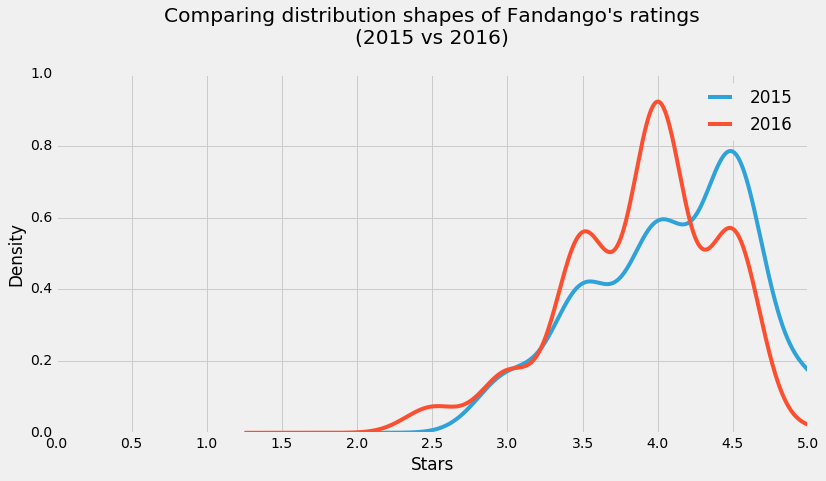

In [32]:
selprevious2015['Fandango_Stars'].plot.kde(label = '2015', legend = True, figsize = (12,6))
selafter2016['fandango'].plot.kde(label = '2016', legend = True)

plt.title("Comparing distribution shapes of Fandango's ratings\n(2015 vs 2016)",
          y = 1.07) # the `y` parameter pads the title upward
plt.xlabel('Stars')
plt.xlim(0,5) # because ratings start at 0 and end at 5
plt.xticks(arange(0,5.1,.5))
plt.show()

In [33]:
selprevious2015['Fandango_Stars'].describe()

count    128.000000
mean       4.085938
std        0.536500
min        3.000000
25%        3.500000
50%        4.000000
75%        4.500000
max        5.000000
Name: Fandango_Stars, dtype: float64

In [34]:
selafter2016['fandango'].describe()

count    191.000000
mean       3.887435
std        0.509540
min        2.500000
25%        3.500000
50%        4.000000
75%        4.250000
max        5.000000
Name: fandango, dtype: float64

> Now let us answer some questions based on our above findings.

### What is the shape of each distribution?
> Answer: Both distributions are strongly left skewed towards 
> highest ratings

### How do their shapes compare? And if their shapes are similar, is there anything that clearly differentiates them?
> Answer: Both the distributions are strongly left skewed towards 
> highest ratings but when comparing each others shapes we see 
> 2016 is slightly shifted to the left compared to the shape of 
> 2015 distribution.

### Can we see any evidence on the graph that suggests that there is indeed a change between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016? And provided there's a difference, can we tell anything about the direction of the difference? In other words, were movies in 2016 rated lower or higher compared to 2015?
> Answer: Yes, though both the distributions are strongly left 
> skewed towards highest ratings but when comparing each others 
> shapes we do see 2016 is slightly shifted to the left compared 
> to the shape of 2015 distribution. This slight difference in 
> their direction towards being left skewed to highest ratings 
> shows that the ratings were slightly lower in 2016 compared 
> to 2015 ratings.

> When comparing the distributions with the help of the kernel 
> density plots was a great start, we now need to analyze more 
> granular information.

In [35]:
# absolute frequency
selprevious2015['Fandango_Stars'].value_counts(dropna = False).sort_index()

3.0    10
3.5    25
4.0    35
4.5    49
5.0     9
Name: Fandango_Stars, dtype: int64

In [36]:
# absolute frequency
selafter2016['fandango'].value_counts(dropna = False).sort_index()

2.5     6
3.0    14
3.5    46
4.0    77
4.5    47
5.0     1
Name: fandango, dtype: int64

In [37]:
# proportional relative frequency
selprevious2015['Fandango_Stars'].value_counts(normalize=True).sort_index()

3.0    0.078125
3.5    0.195312
4.0    0.273438
4.5    0.382812
5.0    0.070312
Name: Fandango_Stars, dtype: float64

In [38]:
# proportional relative frequency
selafter2016['fandango'].value_counts(normalize=True).sort_index()

2.5    0.031414
3.0    0.073298
3.5    0.240838
4.0    0.403141
4.5    0.246073
5.0    0.005236
Name: fandango, dtype: float64

In [39]:
# relative frequency proportional precentages
selprevious2015['Fandango_Stars'].value_counts(normalize=True).sort_index()*100 

3.0     7.81250
3.5    19.53125
4.0    27.34375
4.5    38.28125
5.0     7.03125
Name: Fandango_Stars, dtype: float64

In [40]:
# relative frequency proportional precentages
selafter2016['fandango'].value_counts(normalize=True).sort_index()*100

2.5     3.141361
3.0     7.329843
3.5    24.083770
4.0    40.314136
4.5    24.607330
5.0     0.523560
Name: fandango, dtype: float64

> From above code we do see the difference in ratings of 2015 and 
> 2016 movies. This thus explains us the slight difference we saw 
> above in the kernel density plots direction of 2015 and 2016 
> movie ratings on being left skewed towards the highest ratings.
>
> Now let us dive a bit deeper to see the percentile rank to get 
> more clear picture.

In [41]:
from scipy.stats import percentileofscore

In [42]:
round(percentileofscore(selprevious2015['Fandango_Stars'], score=2.5, kind='weak'), 2)

0.0

In [43]:
round(percentileofscore(selprevious2015['Fandango_Stars'], score=3, kind='weak'),2)

7.81

In [44]:
round(percentileofscore(selprevious2015['Fandango_Stars'], score=3.5, kind='weak'),2)

27.34

In [45]:
round(percentileofscore(selprevious2015['Fandango_Stars'], score=4, kind='weak'),2)

54.69

In [46]:
round(percentileofscore(selprevious2015['Fandango_Stars'], score=4.5, kind='weak'),2)

92.97

In [47]:
round(percentileofscore(selafter2016['fandango'], score=2.5, kind='weak'),2)

3.14

In [48]:
round(percentileofscore(selafter2016['fandango'], score=3, kind='weak'),2)

10.47

In [49]:
round(percentileofscore(selafter2016['fandango'], score=3.5, kind='weak'),2)

34.55

In [50]:
round(percentileofscore(selafter2016['fandango'], score=4, kind='weak'),2)

74.87

In [51]:
round(percentileofscore(selafter2016['fandango'], score=4.5, kind='weak'),2)

99.48

> Let us see the percentile rank of each ratings in 2015 and 2016
>
> |Ratings|Percentile Rank in 2015|Percentile Rank in 2016|
> |:----|:----|:----|
> |2.5|0.0|3.14|
> |3|7.81|10.47|
> |3.5|27.34|34.55|
> |4|54.69|74.87|
> |4.5|92.97|99.48|

#### Thus we can now see clearly that the slight difference we saw above in the kernel density plots direction of 2015 and 2016  movie ratings was because 

> **In 2015 the minimum rating 3 is on 7.81th percentile whereas 
> in 2016 it is on 10.47th percentile of the distribution.**
>
> **And the second highest rating 4.5 in 2015 is on 92.97th 
> percentile whereas in 2016 it is on 99.48th percentile of the 
> distribution.**

> **Thus this finding confirms that indeed the ratings were 
> slightly lower in 2016 compared to 2015 ratings.**

> We did confirmed by now that there is indeed a clear difference 
> between the two distributions. 
>
> However, let us get more clear picture of the difference in the 
> direction we saw on the kernel density plots by taking each 
> distribution of movie ratings and computing its mean, median, 
> and mode, and then compare these statistics to determine what 
> they tell about the direction of the difference.

In [52]:
# Compute the mean, median, and mode for each distribution.

In [53]:
mean_2015 = round(selprevious2015['Fandango_Stars'].mean(),2)
mean_2016 = round(selafter2016['fandango'].mean(),2)

median_2015 = round(selprevious2015['Fandango_Stars'].median(),2)
median_2016 = round(selafter2016['fandango'].median(),2)

mode_2015 = round(selprevious2015['Fandango_Stars'].mode()[0],2) # the output of Series.mode() is a bit uncommon
mode_2016 = round(selafter2016['fandango'].mode()[0],2)

summary = pd.DataFrame({
'2015': [mean_2015, median_2015, mode_2015],
'2016': [mean_2016, median_2016, mode_2016],},
index = ['mean', 'median', 'mode'],)
summary

,2015,2016
mean,4.09,3.89
median,4.00,4.00
mode,4.50,4.00


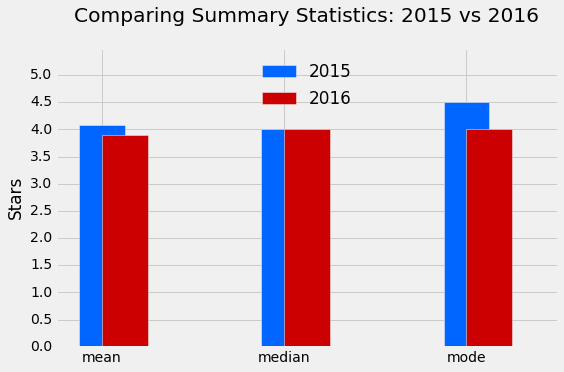

In [54]:
plt.style.use('fivethirtyeight')
summary['2015'].plot.bar(color = '#0066FF', align = 'center', label = '2015', width = .25, figsize = (8,5))
summary['2016'].plot.bar(color = '#CC0000', align = 'edge', label = '2016', width = .25, rot = 0)

plt.title('Comparing Summary Statistics: 2015 vs 2016', y = 1.07)
# the `y` parameter pads the title upward
plt.ylim(0,5.5)
plt.yticks(arange(0,5.1,.5))
plt.ylabel('Stars')
plt.legend(framealpha = 0,loc = 'upper center')
# framealpha, controls the alpha transparency of the legend's background.
plt.show()

In [55]:
meandiff = round(summary.iloc[0,0] - summary.iloc[0,1],2)
meandiff

0.2

In [56]:
mediandiff = round(summary.iloc[1,0] - summary.iloc[1,1],2)
mediandiff

0.0

In [57]:
modediff = round(summary.iloc[2,0] - summary.iloc[2,1],2)
modediff

0.5

In [58]:
# meandiff in percentage relative to the mean rating in 2015
meandiff_per = round(meandiff / summary.iloc[0,0] * 100,2)
meandiff_per

4.89

> As seen in above code:
>
> * The mean of the rating is lower in 2016 with approximately 
> 0.2. that to say a drop of almost 4.89% relative to the mean 
> rating in 2015.
>
> * The median is the same for both 2015 and 2016 rating 
> distributions. 
>
> * The mode is lower in 2016 by 0.5. 
>
> Thus here too it confirms what we saw above - the slight 
> difference in the kernel density plots direction of 2015 and
> 2016 movie ratings that there's indeed a slight difference
> between Fandango's ratings for popular movies in 2015 and 
> Fandango's ratings for popular movies in 2016 - that is the 
> popular movies released in 2016 were rated slightly lower than 
> the popular movies released in 2015.

# Conclusion

> As we set out with a new goal for this project to analyse that 
> whether there's any difference between Fandango's ratings for
> popular movies in 2015 and Fandango's ratings for popular 
> movies in 2016.
>
> And indeed we did analyse that there is a slight difference 
> between Fandango's ratings for popular movies in 2015 and
> Fandango's ratings for popular movies in 2016 - that is the
> popular movies released in 2016 were rated slightly lower than 
> the popular movies released in 2015.
> 
> Seeing this slight changes we can assume that Fandango may have 
> taken some steps to fix the biased rating system after Hickey's
> analysis.